# CS4448 — Breast Cancer Classification (Naive Bayes and Baselines)
**Includes:** data load, shapes, train/test split, model training, predictions, score, confusion matrix, classification report, visualization, K-Fold CV, and multiple-model comparison.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

# For reproducibility
RANDOM_STATE = 11


## Loading the Dataset

In [2]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
print('Dataset loaded: Breast Cancer Wisconsin (Diagnostic)')
print('Feature names (first 5):', breast_cancer.feature_names[:5])
print('Target names:', breast_cancer.target_names)

Dataset loaded: Breast Cancer Wisconsin (Diagnostic)
Feature names (first 5): ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']
Target names: ['malignant' 'benign']


## Checking the Sample and Target Sizes

In [3]:
print('X shape:', X.shape)  # (n_samples, n_features)
print('y shape:', y.shape)
unique, counts = np.unique(y, return_counts=True)
print('Class distribution:', dict(zip(unique, counts)))

X shape: (569, 30)
y shape: (569,)
Class distribution: {np.int64(0): np.int64(212), np.int64(1): np.int64(357)}


## Splitting the Data for Training and Testing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)
print('Training and Testing Set Sizes')
print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

Training and Testing Set Sizes
X_train: (426, 30) y_train: (426,)
X_test: (143, 30) y_test: (143,)


## Creating the Model (GaussianNB)

In [5]:
nb = GaussianNB()
nb

GaussianNB()

## Training the Model

In [6]:
nb.fit(X_train, y_train)

GaussianNB()

## Predicting

In [7]:
y_pred = nb.predict(X_test)
print('First 10 predictions:', y_pred[:10])

First 10 predictions: [1 0 1 0 0 1 1 1 1 0]


## Estimator Method `score`

In [8]:
test_score = nb.score(X_test, y_test)
train_score = nb.score(X_train, y_train)
print(f'Train accuracy: {train_score:.4f}')
print(f'Test  accuracy: {test_score:.4f}')

Train accuracy: 0.9460
Test  accuracy: 0.9231


## Confusion Matrix

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
print('Confusion Matrix (labels 0,1):\n', cm)

Confusion Matrix (labels 0,1):
 [[45  8]
 [ 3 87]]


## Classification Report

In [10]:
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.94      0.85      0.89        53
      benign       0.92      0.97      0.94        90

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



## Visualizing the Confusion Matrix

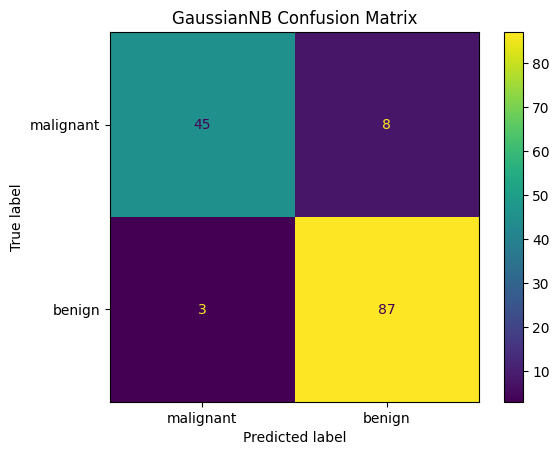

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
fig, ax = plt.subplots()
disp.plot(ax=ax)
plt.title('GaussianNB Confusion Matrix')
plt.show()

## K-Fold Cross-Validation

In [12]:
kfold = KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)
scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
print('CV scores:', scores)
print(f'CV mean: {scores.mean():.4f} ± {scores.std():.4f}')

CV scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
CV mean: 0.9385 ± 0.0275


## Running Multiple Models to Find the Best One

In [13]:
estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

results = {}
for name, est in estimators.items():
    cv_scores = cross_val_score(estimator=est, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
    results[name] = (cv_scores.mean(), cv_scores.std())
    print(f'{name:>20}: mean={cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

best_name = max(results, key=lambda k: results[k][0])
print('\nBest estimator by CV mean:', best_name, '→', f'{results[best_name][0]:.4f} ± {results[best_name][1]:.4f}')

          GaussianNB: mean=0.9385 ± 0.0275
KNeighborsClassifier: mean=0.9279 ± 0.0201


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

  LogisticRegression: mean=0.9508 ± 0.0302
                 SVC: mean=0.9192 ± 0.0352

Best estimator by CV mean: LogisticRegression → 0.9508 ± 0.0302
